<a href="https://colab.research.google.com/github/failure64/ads-optimization/blob/main/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing

### Importing dataset and libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data_set=pd.read_csv('final dataset.csv')

### Handling Missing Data

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ="constant")

### Encoding Categorical Data & Feature Scaling

not possible in our case

### Spliting into test amd training data
Standard 70:30 split

# Upper Confidence Bound

### Multi Armed Bandit Problem (To be Explained)

In [27]:
import math as m
T= 15000
num_ads =10
ads_selected=[]

number_of_selections = [0] * num_ads
sum_of_rewards = [0] * num_ads
total_rewards = 0


In [28]:
for n in range(0,T): #over rows
  ad=0
  max_upper_confidence_bound =0
  for i in range(0,num_ads):
    if (number_of_selections[i] > 0):
      average_reward = sum_of_rewards[i] / number_of_selections[i]
      delta_i = m.sqrt(3/2 * m.log(n+1) / number_of_selections[i])
      upper_confidence_bound = average_reward + delta_i
    else:
      upper_confidence_bound = 1e400
    if(upper_confidence_bound > max_upper_confidence_bound):
      max_upper_confidence_bound = upper_confidence_bound
      ad=i
  ads_selected.append(ad)
  number_of_selections[ad] = number_of_selections[ad] +1
  temp_reward = data_set.values[n,ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + temp_reward
  total_rewards = total_rewards+temp_reward

Visulization

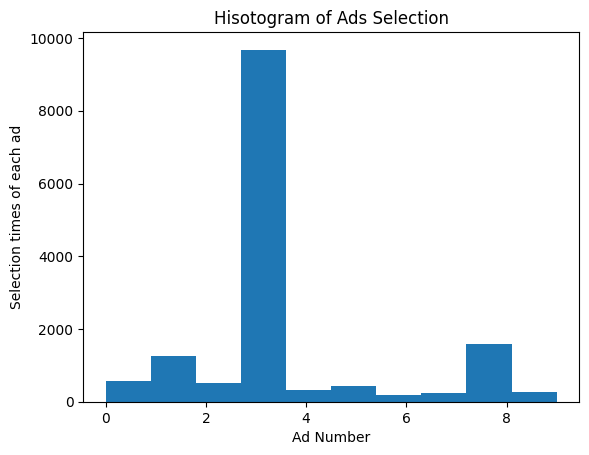

In [29]:
plt.hist(ads_selected)
plt.title('Hisotogram of Ads Selection')
plt.xlabel("Ad Number")
plt.ylabel('Selection times of each ad')
plt.show()